# Output Visualisation Notebook

This notebook has the following structure:
1. **Retrieving Model Outputs**: retrieve and merge different replications of the simulation. The reasoning is that a 10-rep run of the simulation model takes ~4 hours per exit type (ie. A, B, C, AB, ..., ABC).
2. **Experimental results**: visualise model outputs, specifically:
 - average evacuation time per exit type, as numeric outputs
 - total evacuation time per exit type for 10 replications, as numeric outputs
 - the average evacuation time per exit type w/o outliers, in box plots
 - the average evacuation time per exit type w/ outliers, in box plots


# Imports

In [1]:
import os
os.chdir('..')
import sys
sys.path.insert(0, './Scripts')

# This avoids runtime errors in the animation
import nest_asyncio
nest_asyncio.apply()

from Scripts.Experiment import *
from Scripts.EvacuationModel import *

# Retrieving Model Outputs

In [2]:
exp = Experiment()
# modifiers = ['1_A', '1_B','1_C_2_BC','2_AB','3']
modifiers = ['1_A', '1_B','1_C_2_BC','2_AB','3_ABC_pt1','3_ABC_pt2','3_AC_pt1','3_AC_pt2']
dict_list = []
for m in modifiers:
        evac, _ = exp.load_pickled_data(modifier=m)
        dict_list.append(evac)

exp.combine_results(dict_list)

Setting up the experiment ...



# Experimental results
- Average evacuation time per exit, numeric
- All evacuation time per exit, numeric
- Boxplots for evacuation time per exit, without outliers
- Boxplots for evacuation time per exit, with outliers

In [4]:
exp.show_evacuation_time_averages()

Average evacuation times per exit type:

ExitType.A: 168.1
ExitType.B: 157.6
ExitType.C: 536.9
ExitType.BC: 256.2
ExitType.AB: 162.6
ExitType.ABC: 205.9
ExitType.AC: 328.3


In [5]:
exp.show_all_times()


Show all data on the evacuation times:

ExitType.A [163, 165, 264, 142, 146, 164, 146, 177, 183, 131]
ExitType.B [143, 156, 152, 153, 155, 145, 226, 144, 132, 170]
ExitType.C [512, 452, 529, 545, 487, 531, 554, 550, 626, 583]
ExitType.BC [157, 243, 301, 325, 622, 191, 148, 250, 168, 157]
ExitType.AB [139, 139, 170, 159, 176, 156, 165, 145, 180, 197]
ExitType.ABC [379, 161, 189, 163, 209, 299, 173, 142, 184, 160]
ExitType.AC [334, 493, 150, 324, 239, 440, 216, 558, 186, 343]


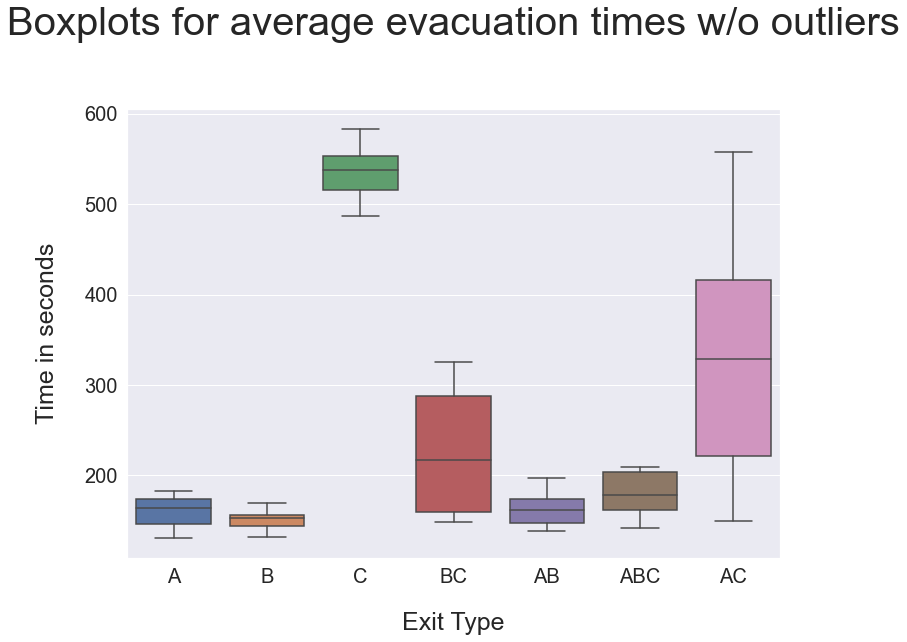

In [6]:
exp.show_boxplot_evacuation_times(outliers=False)

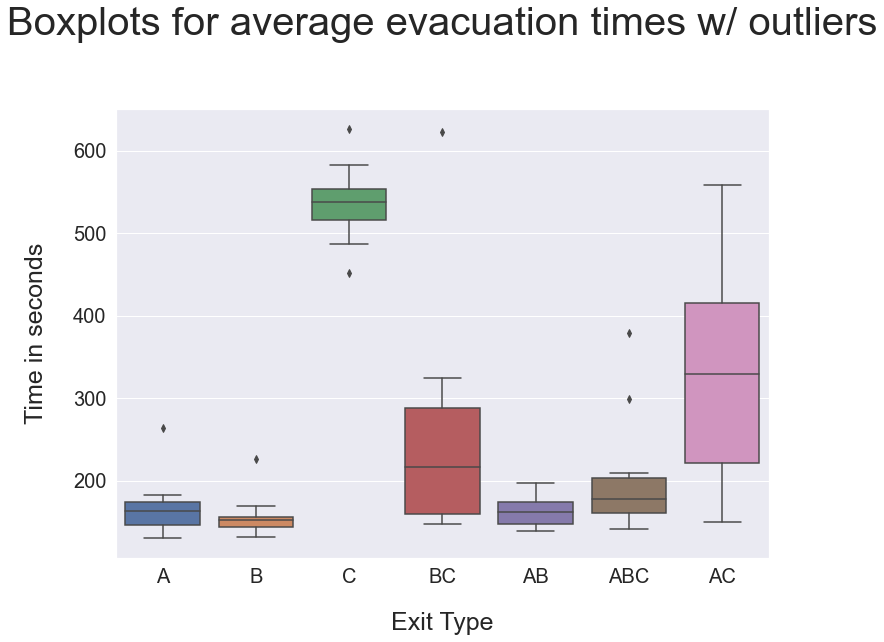

In [7]:
exp.show_boxplot_evacuation_times(outliers=True)


